In [14]:
from facebook_scraper import get_posts
import bs4
import requests

In [2]:
response=requests.get('https://www.facebook.com/HBLBank')
print(response.status_code)

200


In [3]:
from fake_useragent import UserAgent
obj=UserAgent()
header={'user-agent':obj.chrome}
response = requests.get('https://www.facebook.com/HBLBank', headers=header)
soup = bs4.BeautifulSoup(response.content, "html.parser")

Error occurred during loading data. Trying to use cache server https://fake-useragent.herokuapp.com/browsers/0.1.11
Traceback (most recent call last):
  File "C:\Users\afsah.khan\Anaconda3\lib\site-packages\fake_useragent\utils.py", line 154, in load
    for item in get_browsers(verify_ssl=verify_ssl):
  File "C:\Users\afsah.khan\Anaconda3\lib\site-packages\fake_useragent\utils.py", line 99, in get_browsers
    html = html.split('<table class="w3-table-all notranslate">')[1]
IndexError: list index out of range


In [7]:
class1="ll8tlv6m j83agx80 btwxx1t3 n851cfcs hv4rvrfc dati1w0a pybr56ya"
span=soup.find_all('div',class_=class1)
for tag in span:
    print(tag)
    print('\n')


In [20]:
for post in get_posts('https://www.facebook.com/HBLBank',options={'comments':True}):
    fb_post_df=pd.DataFrame.from_Dict(post,orient='index')
    fb_post_df=fb_post_df.transpose()
    post_df_full=post_df_full.append(fb_post_df)
    print(post['post_id']+'get')

SSLError: HTTPSConnectionPool(host='m.facebook.com', port=443): Max retries exceeded with url: /https://www.facebook.com/HBLBank/?locale=en_US (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)')))

In [2]:
import pandas as pd
df=pd.read_json('hbl_fb_latest.json')
df

,categories,info,likes,messenger,posts,priceRange,title,pageUrl,address,awards,...,twitter,website,youtube,mission,overview,services,reviews,payment,checkins,verified
0,[Organization],"[HBL is Pakistan’s oldest, largest, and most p...",1622220,https://m.me/53999423672,"[{'postDate': '2022-03-22T15:00:48.000Z', 'pos...",NaN,HBL - Home | Facebook,https://www.facebook.com/HBLBank,"{'city': None, 'lat': None, 'lng': None, 'post...",[],...,NaN,http://www.hbl.com/,NaN,[],[],[],"{'average': None, 'count': None, 'reviews': []}",NaN,NaN,False


In [4]:
df2=df.posts
df2=list(df2)
df2=df2[0]

print(type(df2))
print(len(df2))

df3=df2[39]
print(type(df3))
print(len(df3))
for i in df3:
    print(i)
df3['postText']
df3['postStats']
print(len(df3['postComments']['comments']))
df3['postComments']
for i in df3['postComments']['comments']:
    print(i['text'])
    
df3['postStats']['shares']

<class 'list'>
142
<class 'dict'>
7
postDate
postText
postImages
postLinks
postUrl
postStats
postComments
27
Umme Hani  😝
Aliza Imran
Geo pti
None
Bhot acha
Ahsan Baig ??
Is home delivery available with 20% off
Samar Aneel chale?😘
Hi
Ammar Qaisar
Saqib Baig hbl hai?
Yummiest
Oh yes
None
why not installment plan on daraz app.
Bank change krny kaa soch rahy abbh tu
Musaib Haider Ali  Shaikh Muhammad Hassan
Hi
Ali Aaftab check kr!
Is any job available in HBL?
Hello HBL
Is this valid for pay pak debit card?
Noman Rasheed
Muhammad Zayam?
Mujhe HBL min account open Karwana hi
Hello
Sheikh Shaheryar Jamil
Hi


18

In [5]:
csv_data=[]
for i in range(len(df2)):
    sub_data=df2[i]
    for j in sub_data['postComments']['comments']:
        lst=[i]
        lst.append(sub_data['postDate'])
        lst.append(sub_data['postText'].strip('\n'))
        lst.append(sub_data['postStats']['comments'])
        lst.append(sub_data['postStats']['reactions'])
        lst.append(sub_data['postStats']['shares'])
        lst.append(j['text'])
        csv_data.append(lst)
print(csv_data)

[[0, '2022-03-22T15:00:48.000Z', 'HBL achieves another milestone. PKR 1 Billion loans have been disbursed under the SME Asaan Finance Scheme of State Bank of Pakistan by HBL', 118, 420, 21, 'Bilal Saeed'], [0, '2022-03-22T15:00:48.000Z', 'HBL achieves another milestone. PKR 1 Billion loans have been disbursed under the SME Asaan Finance Scheme of State Bank of Pakistan by HBL', 118, 420, 21, 'My name is Saddam Hussain. I am from Qambar Shahdakot district of Sindh. I am a taxi driver. I drive my own car. I have an old model car. Rate is also talking from the sky. I need a loan from your HBL Clear Finance. I have gone to Shahdadkot branch and slipped away. The manager is not giving any response. Get a new model car. May Allah bless you'], [0, '2022-03-22T15:00:48.000Z', 'HBL achieves another milestone. PKR 1 Billion loans have been disbursed under the SME Asaan Finance Scheme of State Bank of Pakistan by HBL', 118, 420, 21, '5 sal me aj tak bank statement nahi mila mujhe or msg ata ha k 

In [6]:
import csv

In [7]:
column_names=['postNo.','post_date','post_text','comments_num','reaction_num','shares_num','comment_text']
with open("hbl_fb.csv", "w",encoding='UTF8',newline='') as csv_file:
    writer = csv.writer(csv_file)

    # write the header
    writer.writerow(column_names)

    # write multiple rows
    writer.writerows(csv_data)

PermissionError: [Errno 13] Permission denied: 'hbl_fb.csv'

In [8]:
data=pd.read_csv('hbl_fb.csv')
data

,postNo.,post_date,post_text,comments_num,reaction_num,shares_num,comment_text
0,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Bilal Saeed
1,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,My name is Saddam Hussain. I am from Qambar Sh...
2,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,5 sal me aj tak bank statement nahi mila mujhe...
3,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,CAN YOU TE ME THAT CAN I OPEN A ACCOUNT WITH B...
4,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Any shopping card ?
...,...,...,...,...,...,...,...
2755,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,"Withdraw Your Money from HBL , UBL, MCB and NB..."
2756,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,👍
2757,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,👍
2758,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,🤔


In [113]:
data.post_text.unique()

array(['Empowering women with financial freedom and a Riba free savings option!\n\nNow offering an even higher profit rate of 10.53% on HBL Nisa Tawfir Account.\nTo apply for your HBL Nisa Tawfir Account, visit your nearest HBL Islamic Branch, Islamic Window or visit https://www.hbl.com/…/hbl-nisa-tawfir-islamic-savings-accou… for more details.\n\n#HBL #HBLNisaTawfir #HBLIslamicBanking',
       "HBL encourages the strength, determination and achievements of it's female employees. Here's what Shagufta Ahmed, Branch Operations Manager, Gujranwala has to say about her experience:\n'My story of self-discovery started in 2013 with my banking career at the largest bank in Pakistan.\nBorn in a male dominant society, I was raised by my mother well enough to be able to compete with men at all levels, compete with merit and be honest towards my profession. When I became a mother myself that struggle became two-fold. Raising two children while maintaining the same level of performance at my branc

In [109]:
text="HBL encourages the strength, determination and achievements of it's female employees. Here's what Shagufta Ahmed, Branch Operations Manager, Gujranwala has to say about her experience:\n'My story of self-discovery started in 2013 with my banking career at the largest bank in Pakistan.\nBorn in a male dominant society, I was raised by my mother well enough to be able to compete with men at all levels, compete with merit and be honest towards my profession. When I became a mother myself that struggle became two-fold. Raising two children while maintaining the same level of performance at my branch was my utmost ambition throughout.\nMy 8-year-long journey took me to many branches of HBL, some were at excellent performance before my joining, and some of them were revived through my experience and teamwork.\nI found everyone in my branch to be a dedicated team player. We never allowed our personal life to affect our professional growth and vice versa. I am thankful to HBL for building trust in me and empowering me with strength, perseverance and growth throughout.'\n#HBL #HBLDiversity #WomenEmpowerment"
text='Empowering women with financial freedom and a Riba free savings option!\n\nNow offering an even higher profit rate of 10.53% on HBL Nisa Tawfir Account.\nTo apply for your HBL Nisa Tawfir Account, visit your nearest HBL Islamic Branch, Islamic Window or visit https://www.hbl.com/…/hbl-nisa-tawfir-islamic-savings-accou… for more details.\n\n#HBL #HBLNisaTawfir #HBLIslamicBanking'
print(text.strip('\n').strip(''))

Empowering women with financial freedom and a Riba free savings option!

Now offering an even higher profit rate of 10.53% on HBL Nisa Tawfir Account.
To apply for your HBL Nisa Tawfir Account, visit your nearest HBL Islamic Branch, Islamic Window or visit https://www.hbl.com/…/hbl-nisa-tawfir-islamic-savings-accou… for more details.

#HBL #HBLNisaTawfir #HBLIslamicBanking


In [9]:
from textblob import TextBlob
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\afsah.khan\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [123]:
from nltk.corpus import brown
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [125]:
wiki = TextBlob("Python is a high-level, general-purpose programming language.")
wiki.tags

[('Python', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('high-level', 'JJ'),
 ('general-purpose', 'JJ'),
 ('programming', 'NN'),
 ('language', 'NN')]

In [152]:
txt = TextBlob("Textblob is terrible!")
for i in txt.noun_phrases:
    print(i)
x=txt.sentences[0].words[2]
print(x.lemmatize('a'))

for i in txt.ngrams(3):
    print(i)
txt.sentiment

textblob
terrible
['Textblob', 'is', 'terrible']


Sentiment(polarity=-1.0, subjectivity=1.0)

In [146]:
blob = TextBlob("Analytics Vidhya is a great platform to learning data science. \n It helps community through blogs, hackathons, discussions,etc.")
blob.sentences[1].words[1].singularize()
blob.sentences[0].words[5].pluralize()
blob.sentences[0].words[7].lemmatize('v')
blob.sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

In [166]:
import spacy
import en_core_web_sm
text ='Dave watched as the forest burned up on the hill,only a few miles from his house. The car had been hastily packed and Marta was inside trying to round up the last of the pets. "Where could she be?" he wondered as he continued to wait for Marta to appear with the pets.'
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
token_list = [token for token in doc]
token_list

[Dave,
 watched,
 as,
 the,
 forest,
 burned,
 up,
 on,
 the,
 hill,
 ,,
 only,
 a,
 few,
 miles,
 from,
 his,
 house,
 .,
 The,
 car,
 had,
 been,
 hastily,
 packed,
 and,
 Marta,
 was,
 inside,
 trying,
 to,
 round,
 up,
 the,
 last,
 of,
 the,
 pets,
 .,
 ",
 Where,
 could,
 she,
 be,
 ?,
 ",
 he,
 wondered,
 as,
 he,
 continued,
 to,
 wait,
 for,
 Marta,
 to,
 appear,
 with,
 the,
 pets,
 .]

In [168]:
filtered_tokens = [token for token in doc if not token.is_stop]
filtered_tokens

[Dave,
 watched,
 forest,
 burned,
 hill,
 ,,
 miles,
 house,
 .,
 car,
 hastily,
 packed,
 Marta,
 inside,
 trying,
 round,
 pets,
 .,
 ",
 ?,
 ",
 wondered,
 continued,
 wait,
 Marta,
 appear,
 pets,
 .]

In [177]:
lemmas = [f"Token: {token}, lemma: {token.lemma_}"for token in filtered_tokens]
lemmas

['Token: Dave, lemma: Dave',
 'Token: watched, lemma: watch',
 'Token: forest, lemma: forest',
 'Token: burned, lemma: burn',
 'Token: hill, lemma: hill',
 'Token: ,, lemma: ,',
 'Token: miles, lemma: mile',
 'Token: house, lemma: house',
 'Token: ., lemma: .',
 'Token: car, lemma: car',
 'Token: hastily, lemma: hastily',
 'Token: packed, lemma: pack',
 'Token: Marta, lemma: Marta',
 'Token: inside, lemma: inside',
 'Token: trying, lemma: try',
 'Token: round, lemma: round',
 'Token: pets, lemma: pet',
 'Token: ., lemma: .',
 'Token: ", lemma: "',
 'Token: ?, lemma: ?',
 'Token: ", lemma: "',
 'Token: wondered, lemma: wonder',
 'Token: continued, lemma: continue',
 'Token: wait, lemma: wait',
 'Token: Marta, lemma: Marta',
 'Token: appear, lemma: appear',
 'Token: pets, lemma: pet',
 'Token: ., lemma: .']

In [10]:
data=data.dropna()
data= data.reset_index(drop = True)
data

,postNo.,post_date,post_text,comments_num,reaction_num,shares_num,comment_text
0,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Bilal Saeed
1,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,My name is Saddam Hussain. I am from Qambar Sh...
2,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,5 sal me aj tak bank statement nahi mila mujhe...
3,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,CAN YOU TE ME THAT CAN I OPEN A ACCOUNT WITH B...
4,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Any shopping card ?
...,...,...,...,...,...,...,...
2657,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,"Withdraw Your Money from HBL , UBL, MCB and NB..."
2658,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,👍
2659,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,👍
2660,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,🤔


In [13]:
import re
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [204]:
data["comment_text"]

0                                             Bilal Saeed
1       My name is Saddam Hussain I am from Qambar Sha...
2       5 sal me aj tak bank statement nahi mila mujhe...
3       CAN YOU TE ME THAT CAN I OPEN A ACCOUNT WITH B...
4                                      Any shopping card 
                              ...                        
2755    Withdraw Your Money from HBL , UBL, MCB and NB...
2756                                                    👍
2757                                                    👍
2758                                                    🤔
2759                             Just woman ka Lia ha kia
Name: comment_text, Length: 2760, dtype: object

In [11]:
def cleaning(string):
    new_string=re.sub('[^a-zA-Z0-9]',' ',string)
    cleaned_string=re.sub('\s+',' ',new_string)
    return cleaned_string

In [14]:
for i in range(len(data.comment_text)):
    data.comment_text[i]=cleaning(data.comment_text[i])

C:\Users\afsah.khan\AppData\Local\Temp\ipykernel_6488\2030716198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.comment_text[i]=cleaning(data.comment_text[i])


In [15]:
import numpy as np
data['comment_text'].replace(' ', np.nan, inplace=True)
data=data.dropna()
data

,postNo.,post_date,post_text,comments_num,reaction_num,shares_num,comment_text
0,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Bilal Saeed
1,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,My name is Saddam Hussain I am from Qambar Sha...
2,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,5 sal me aj tak bank statement nahi mila mujhe...
3,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,CAN YOU TE ME THAT CAN I OPEN A ACCOUNT WITH B...
4,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Any shopping card
...,...,...,...,...,...,...,...
2654,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,Congratulations
2655,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,HBL is a highly active service thanks a lot
2656,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,Ab yeh Sackeem Chal Rahi Hai
2657,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,Withdraw Your Money from HBL UBL MCB and NBP I...


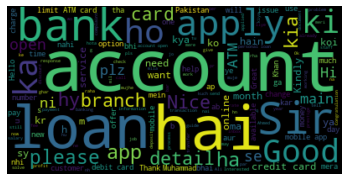

In [16]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","HBL"])
textt = " ".join(review for review in data.comment_text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()


In [91]:
from langdetect import detect
x= detect(data.comment_text[83])
print(x)
if x !='en':
    print(detect(data.comment_text[83]))


en


In [92]:
from langdetect import detect
count=0

for i in range(len(data.comment_text)):
    text=data.comment_text[i]
    try:
        if detect(text)!='en':
            count+=1  
    except:
        continue

print(count)

1354


In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans

In [18]:
test = []
for x in data['comment_text']:
    test.append(x)

In [19]:
cnt_vectorizer = CountVectorizer(stop_words='english')
cnt_vectorizer.fit(test)
print(cnt_vectorizer.vocabulary_)

{'bilal': 692, 'saeed': 3332, 'saddam': 3326, 'hussain': 1712, 'qambar': 3095, 'shahdakot': 3484, 'district': 1182, 'sindh': 3548, 'taxi': 3727, 'driver': 1222, 'drive': 1221, 'car': 816, 'old': 2824, 'model': 2619, 'rate': 3162, 'talking': 3700, 'sky': 3573, 'need': 2746, 'loan': 2362, 'hbl': 1591, 'clear': 942, 'finance': 1374, 'gone': 1494, 'shahdadkot': 3483, 'branch': 748, 'slipped': 3576, 'away': 501, 'manager': 2449, 'giving': 1485, 'response': 3257, 'new': 2753, 'allah': 333, 'bless': 706, 'sal': 3365, 'aj': 303, 'tak': 3695, 'bank': 573, 'statement': 3628, 'nahi': 2723, 'mila': 2564, 'mujhe': 2684, 'msg': 2662, 'ata': 470, 'ha': 1527, 'courier': 1015, 'kardia': 1987, 'jane': 1867, 'kahan': 1953, 'bhej': 675, 'rahe': 3129, 'hain': 1536, 'te': 3732, 'open': 2835, 'account': 218, 'form': 1395, 'number': 2802, 'shopping': 3520, 'card': 818, 'details': 1118, 'want': 3992, 'apply': 398, 'deatails': 1079, 'pata': 2913, 'nai': 2726, 'kin': 2145, 'ko': 2183, 'milrahay': 2571, 'free': 1

In [20]:
vec1 = cnt_vectorizer.transform(test).toarray()
print(vec1.shape)

(2518, 4171)


In [21]:
vec1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans


In [23]:
data=data.drop(columns=['post_date'])
data

,postNo.,post_text,comments_num,reaction_num,shares_num,comment_text
0,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Bilal Saeed
1,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,My name is Saddam Hussain I am from Qambar Sha...
2,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,5 sal me aj tak bank statement nahi mila mujhe...
3,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,CAN YOU TE ME THAT CAN I OPEN A ACCOUNT WITH B...
4,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Any shopping card
...,...,...,...,...,...,...
2654,140,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,Congratulations
2655,140,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,HBL is a highly active service thanks a lot
2656,140,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,Ab yeh Sackeem Chal Rahi Hai
2657,140,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,Withdraw Your Money from HBL UBL MCB and NBP I...


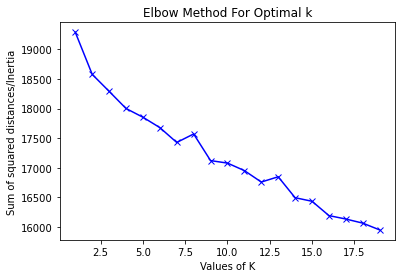

In [24]:
Sum_of_squared_distances = []
K = range(1,20)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(vec1)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()


In [49]:
km = KMeans(n_clusters=5)
km.fit(vec1)

KMeans(n_clusters=5)

In [50]:
labels = km.labels_
labels

array([0, 3, 0, ..., 0, 3, 0])

In [51]:
np.unique(labels,return_counts=True)

(array([0, 1, 2, 3, 4]), array([1920,    1,    3,  593,    1], dtype=int64))

Set A 1920
Set B 1
Set C 3
Set D 593
Set E 1


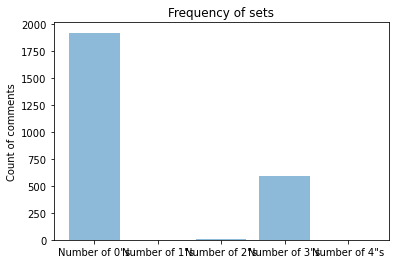

In [52]:
SetA = 0
SetB = 0
setC = 0
setD = 0
setE = 0

for x in labels:
    if x == 0:
        SetA = SetA + 1
    elif x==1:
        SetB = SetB + 1
    elif x==2:
        setC = setC + 1
    elif x==3:
        setD = setD + 1
    else:
        setE = setE + 1
        
print('Set A', SetA)
print('Set B', SetB)
print('Set C', setC)
print('Set D', setD)
print('Set E', setE)


objects = ('Number of 0"s', 'Number of 1"s','Number of 2"s','Number of 3"s','Number of 4"s')
y_pos = np.arange(len(objects))
performance = [SetA,SetB,setC,setD,setE]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count of comments')
plt.title('Frequency of sets')
 
plt.show()

In [72]:
# using TextBlob library
positive_cmnts = []
negative_cmnts = []
neutral_cmnts  = []
sentiment = []
for comment in data["comment_text"]:
    print(comment)
    analysis = TextBlob(comment)
    print(analysis.sentiment)
    if analysis.sentiment[0]>0.1:
       sentiment.append('Positive')
       positive_cmnts.append(comment)
       print ('Positive')
    elif analysis.sentiment[0]<0:
       sentiment.append('Negative')
       negative_cmnts.append(comment)
       print ('Negative')
    else:
       sentiment.append('Neutral')
       neutral_cmnts.append(comment)
       print ('Neutral')

Bilal Saeed
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
My name is Saddam Hussain I am from Qambar Shahdakot district of Sindh I am a taxi driver I drive my own car I have an old model car Rate is also talking from the sky I need a loan from your HBL Clear Finance I have gone to Shahdadkot branch and slipped away The manager is not giving any response Get a new model car May Allah bless you
Sentiment(polarity=0.23409090909090907, subjectivity=0.5094696969696969)
Positive
5 sal me aj tak bank statement nahi mila mujhe or msg ata ha k statement courier kardia ha Jane Kahan bhej rahe hain 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
CAN YOU TE ME THAT CAN I OPEN A ACCOUNT WITH B FORM NUMBER
Sentiment(polarity=0.0, subjectivity=0.5)
Neutral
Any shopping card 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Details
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
I want to apply
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Deatails 
Sentiment(polarity=0.0, subjectivity=0

Sentiment(polarity=0.125, subjectivity=0.375)
Positive
I registered my all required documents on 4th april still account not opened
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Hbl walo ko chiya k online account veryfaid ho app k zariya
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Account online biometric system laya jaya hbl walo ko kasa hbl mfb walo ka Hy online ho jata Hy account veryfaid
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Sir hum hbl me apna acount band kaisy kar skty hyn
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
 2 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Hbl sa lone kitny pasu thk mil jata ha b asanii
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Hbl sa loan kas milta ha 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Hbl app bnaya msg e nh send krty
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
bkws service
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Mara account ma paso ka msg ni a rha mbil ma
Sentiment(polarity=0.0, s

Neutral
Salam No profit is deposited in my account although HBL said that at the end of every month profit will be deposited in your account Plz fix date for depositing profit from HBL
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Details
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
How can we apply
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Hbl mobile Instalment plan 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Sajjaidzongndl
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Sajjaid
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Umme Hani 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Aliza Imran
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Geo pti
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Bhot acha
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Ahsan Baig 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Is home delivery available with 20 off
Sentiment(polarity=0.4, subjectivity=0.4)
Positive
Samar Aneel chale 
Sentiment(polarity=0.0, sub

Neutral
Taimour Khan Ghori
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Has SanR Ansari Nabeel Khan
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Waqas Ch Boss 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Chaudhry Ahsan Ameer
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Gohar Shah Sumaira Gohar
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Haroon Rashid des perdais py b off
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Ammad Ali Wasif Uddin
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Ali Tayyab
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Atiq Ur Rehman
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
What about HBL mastercard sada wala debit card
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
How to apply For Job in HBL
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Sheikh Abdul Wahab Waleed Arshad
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Wamiq Zubair
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Please share the registered co

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Good banking
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Positive
Account kholwana hai mujhe HBL mein kya dettel hai iski
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
HBL talking about work Balance 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Mashallah
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Wow
Sentiment(polarity=0.1, subjectivity=1.0)
Neutral
Best one
Sentiment(polarity=1.0, subjectivity=0.3)
Positive
There is no ATM facility in KPK district kurram Parachinar Alizai
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Koi shaak nhi
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Best one
Sentiment(polarity=1.0, subjectivity=0.3)
Positive
An mosalmn howe
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
 HBL 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Best one
Sentiment(polarity=1.0, subjectivity=0.3)
Positive
I complained about rast id not creating for my account still after 20 days my issue rem

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Ye kB tak scheme available he Kia government k change hony sy ye band to ni ho ga 
Sentiment(polarity=0.4, subjectivity=0.4)
Positive
Saqib Ali
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Dr Koondhar Shaikh enjoy 
Sentiment(polarity=0.4, subjectivity=0.5)
Positive
How to order online HBL atm card 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Is ramzan deal from nandos is valid with this discount 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Nice
Sentiment(polarity=0.6, subjectivity=1.0)
Positive
Qasim Ali Shigri
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Make it for whole Ramadan
Sentiment(polarity=0.2, subjectivity=0.4)
Positive
MsshaAllah
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Chalo kal
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Omer Azhar
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Zunera Amjed
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Y offer ha kahdar
Sentiment(polarity=0.0, su

Sentiment(polarity=0.4, subjectivity=0.5)
Positive
Details batawo plz
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
AMEN 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
sr myra bhai spain hota hy hum ghr k ley kysy applay kr skty hyn
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Apply kar kar thaak gye hai lekin reaponse koi ni milta ap log sirf apna promotion kar rhe ho or kuch ni
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Hum bhi ye scheme chye
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Mujy ghar ki zarorat hai
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Apply process
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Mujy bi Ghar ki zarorat hy Is ky lye kissat kitni ho gi Plz inform to me Thanks
Sentiment(polarity=0.2, subjectivity=0.2)
Positive
I request each and every person applying for this loan to NOT choose this bank My sister application was submitted 2 months back and it has not even started being processed yet The person responsible for moving 

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Kindly add loan option
Sentiment(polarity=0.6, subjectivity=0.9)
Positive
Sir g mn ny teen dafa hbl app kola ha lekin bar bar band hota ha Q
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Hbl Ali
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Mere account ko open Hua Hai 6 month ho gaye hain 6 month abhi tak ATM card nahin mila digital counter
Sentiment(polarity=-0.16666666666666666, subjectivity=0.3333333333333333)
Negative
Mere pas HBL PLS saving account he likin HBL ka debit card nai he kiya mai HBL Mobile App use kar sakta hon ya nai 
Sentiment(polarity=-0.5, subjectivity=0.5)
Negative
HBL Mobile App use karne ke liye HBL ka debit card banwana zrori he ya nai 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Week before last week I applied my lost debit card wich I applied at the branch Haven t received my card yet so I called the helpline for status on 021111111425 coustomer support staff is such an unbelievable response Mr 

Sentiment(polarity=0.6000000000000001, subjectivity=0.9)
Positive
Mobile packages update please
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Nice bank
Sentiment(polarity=0.6, subjectivity=1.0)
Positive
Update mobile packages plz
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Good App Mobile packages plz update New packages internet not available Plz
Sentiment(polarity=0.21212121212121207, subjectivity=0.48484848484848486)
Positive
I had taken a loan from HBL I am a poor man I got a loan from a bank in the words of Casey a small employee I would like to request the officers of the bank to deduct seven or eight thousand from my salary so that my expenses can be met 
Sentiment(polarity=-0.325, subjectivity=0.5)
Negative
Right
Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)
Positive
Hi bro mere hbl mob application se kesi aur account pr online transactions nhi ho pa rhi waja kya hai only load hoskta hai bs
Sentiment(polarity=-0.25, subjectivity=0.75)
Negativ

Sentiment(polarity=0.3666666666666667, subjectivity=0.6333333333333333)
Positive
Sir meri e statements only 3 months ki a rhi he lekin muje 1 year ki chahiye Plz resolve this issue
Sentiment(polarity=0.0, subjectivity=1.0)
Neutral
Mera account ka mar oupdate krna taha mobali aaps sy hojyga
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
yar mera account faslabad ma agriculture uni ma open hia ab ma muzfferghar ma ho ksy chnge kya jay plz hlp me
Sentiment(polarity=0.0, subjectivity=0.5)
Neutral
Sir g Mia fc sa retair ho mer montly 15000 income ha
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Sir g moja Koch lone ke zaroth ha detail bage da Mera what s no 03454680041
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Best Banking App 
Sentiment(polarity=1.0, subjectivity=0.3)
Positive
Good HBL
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Positive
mara atm card pai ak bar password wrong lag gea vo deactive ho gea hai usy active kasy karvo 
Sentiment(polarity=-0.3166666666

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Job
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Can I upgrade my Account HBL ID to salary Account or business 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Zaheer Abbas
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
My na account kulwana hy kia detail hy
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Hbl team why not resolve my concerns
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Hbl Account mujha Khulwana hai kesa Khula Ga
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Meny Account open krwaya tha digital Tariky Se Lekin Acc tital Galat Kr Dia Ab Branch Waly bhi theek nahi kr rhy me kia krun
Sentiment(polarity=0.0, subjectivity=0.25)
Neutral
Is it also allowe us to receive recurring payments from clients automatically 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Hello
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
If hbl account holder have salary almost 150000 how much loan approved to him
Sentiment(

Sentiment(polarity=0.0, subjectivity=0.5)
Neutral
Tell me about monthly saving account 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Tell me about monthly saving account 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Ktna amount save rakheen bank main tu 13 kasy mlyy ga mtlb 2 lac deposits ho tu pr month ktna mly ga 
Sentiment(polarity=0.16666666666666666, subjectivity=0.3333333333333333)
Positive
SIR G AGAR ATM CARD GHOM HOJAYE TO DOSRA KASY LANA HOGA
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
 m 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Link open karne k bawajood confusion hy 13 kitni raqam jama karwain to mile ga Tier 1 pe kitna tier 2 pe kitna aur baqion pe kitna mile ga 
Sentiment(polarity=0.0, subjectivity=0.5)
Neutral
Sir ya online open ho skta 
Sentiment(polarity=0.0, subjectivity=0.5)
Neutral
What about students 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Ya bank acha ny hai mara ID p salary a thi us last ma 22 tha to jb ID p aya tha to 33 lika 

In [35]:
print(sentiment)

['Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Positive',

In [36]:
data.insert(6,'Sentiment',sentiment)
data

,postNo.,post_text,comments_num,reaction_num,shares_num,comment_text,Sentiment
0,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Bilal Saeed,Neutral
1,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,My name is Saddam Hussain I am from Qambar Sha...,Positive
2,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,5 sal me aj tak bank statement nahi mila mujhe...,Neutral
3,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,CAN YOU TE ME THAT CAN I OPEN A ACCOUNT WITH B...,Neutral
4,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Any shopping card,Neutral
...,...,...,...,...,...,...,...
2654,140,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,Congratulations,Neutral
2655,140,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,HBL is a highly active service thanks a lot,Positive
2656,140,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,Ab yeh Sackeem Chal Rahi Hai,Neutral
2657,140,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,Withdraw Your Money from HBL UBL MCB and NBP I...,Neutral


In [73]:
print('Number of positive comments:',len(positive_cmnts))
print('Number of negative comments:',len(negative_cmnts))
print('Number of neutral comments:',len(neutral_cmnts))

Number of positive comments: 537
Number of negative comments: 143
Number of neutral comments: 1838


In [74]:
total=len(sentiment)
pos=(len(positive_cmnts)/total)*100
neg=(len(negative_cmnts)/total)*100
neutral=(len(neutral_cmnts)/total)*100
print(pos,neg,neutral)

21.326449563145353 5.679110405083399 72.99444003177125


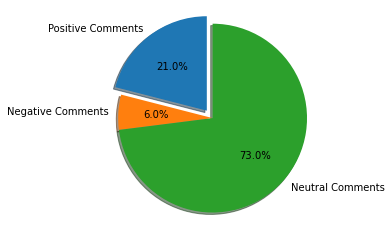

In [75]:
labels = 'Positive Comments','Negative Comments','Neutral Comments'
sizes = [round(pos),round(neg),round(neutral)]
explodes = (0.1,0,0)
fig,ax = plt.subplots()
ax.pie(sizes,labels = labels,explode = explodes, autopct='%1.1f%%',shadow = True,startangle=90)
ax.axis('equal')
plt.show()

In [54]:
# using spaCy
import spacy
import en_core_web_sm
from  spacy.lang.en.stop_words import STOP_WORDS
nlp = en_core_web_sm.load()

# To build a list of stop words for filtering
stopwords = list(STOP_WORDS)
print(stopwords)

['part', 'their', 'seeming', 'beside', 'mine', 'around', 'no', 'otherwise', 'yourself', '’ll', 'much', 'are', 'during', 'nor', '‘s', '’s', 'toward', 'her', 'ourselves', 'themselves', 'somehow', 'until', 'up', 'you', 'me', 'nobody', 'whereafter', 'thence', 'about', 'behind', 'nowhere', 'show', 'yet', 'onto', 'down', 'whatever', 'anything', 'whoever', 'anyway', 'being', "'re", 'although', 'them', 'eight', '‘m', 'our', 'own', 'moreover', 'perhaps', 'anyhow', 'via', '’ve', 'therein', 'above', 'should', 'over', 'ours', 'what', 'has', 'rather', 'seemed', 'while', 'though', 'a', 'at', 'least', 'one', 'after', 'too', 'front', 'whereupon', 'done', 'n‘t', 'using', 'must', 'unless', 'they', 'he', 'neither', 'why', 'more', 'had', 'whenever', 'below', 'within', 'itself', "'ve", 'but', 'my', 'latterly', 'therefore', 'twenty', 'who', 'once', 'against', '‘re', "n't", 'last', 'thus', 'these', 'made', 'become', 'does', 'many', 'on', 'enough', 'none', 'hereafter', 'herein', 'four', 'whence', 'each', 'wel

In [55]:
import string
punctuations = string.punctuation
# Creating a Spacy Parser
from spacy.lang.en import English
parser = English()

In [ ]:
from transformers import pipeline
sentiment = pipeline(task = 'sentiment-analysis')
results = sentiment('i am good')
print(results['label'])

In [59]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

In [60]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

In [77]:
data= data.reset_index(drop = True)
data

,postNo.,post_text,comments_num,reaction_num,shares_num,comment_text,Sentiment_textblob,Sentiment_spacy
0,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Bilal Saeed,Neutral,Neutral
1,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,My name is Saddam Hussain I am from Qambar Sha...,Positive,Positive
2,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,5 sal me aj tak bank statement nahi mila mujhe...,Neutral,Neutral
3,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,CAN YOU TE ME THAT CAN I OPEN A ACCOUNT WITH B...,Neutral,Neutral
4,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Any shopping card,Neutral,Neutral
...,...,...,...,...,...,...,...,...
2513,140,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,Congratulations,Neutral,Neutral
2514,140,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,HBL is a highly active service thanks a lot,Positive,Neutral
2515,140,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,Ab yeh Sackeem Chal Rahi Hai,Neutral,Neutral
2516,140,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,Withdraw Your Money from HBL UBL MCB and NBP I...,Neutral,Neutral


In [70]:
sent_label1=[]
sent_score1=[]
pos=0
neg=0
neutral=0

for i in range(len(data.comment_text)):
    doc=nlp(data.comment_text[i])
    sentiment = doc._.blob.polarity
    sentiment = round(sentiment,2)

    if sentiment > 0.1:
        sent_label = "Positive"
        pos+=1
    elif sentiment < 0:
        sent_label = "Negative"
        neg+=1
    else:
        sent_label='Neutral'
        neutral+=1

    sent_label1.append(sent_label)
    sent_score1.append(sentiment)
print(sent_label1)

['Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Neutral', '

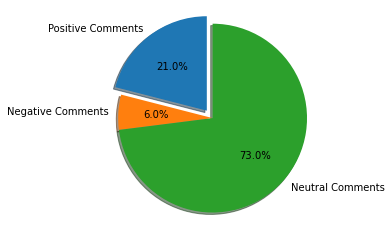

In [71]:
total=len(sent_label1)
pos_percent=(pos/total)*100
neg_percent=(neg/total)*100
neutral_percent=(neutral/total)*100

labels = 'Positive Comments','Negative Comments','Neutral Comments'
sizes = [round(pos_percent),round(neg_percent),round(neutral_percent)]
explodes = (0.1,0,0)
fig,ax = plt.subplots()
ax.pie(sizes,labels = labels,explode = explodes, autopct='%1.1f%%',shadow = True,startangle=90)
ax.axis('equal')
plt.show()

In [78]:
#data.insert(7,'Sentiment_spacy',sent_label1)
#data.rename(columns = {'Sentiment':'Sentiment_textblob'}, inplace = True)
data

,postNo.,post_text,comments_num,reaction_num,shares_num,comment_text,Sentiment_textblob,Sentiment_spacy
0,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Bilal Saeed,Neutral,Neutral
1,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,My name is Saddam Hussain I am from Qambar Sha...,Positive,Positive
2,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,5 sal me aj tak bank statement nahi mila mujhe...,Neutral,Neutral
3,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,CAN YOU TE ME THAT CAN I OPEN A ACCOUNT WITH B...,Neutral,Neutral
4,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Any shopping card,Neutral,Neutral
...,...,...,...,...,...,...,...,...
2513,140,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,Congratulations,Neutral,Neutral
2514,140,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,HBL is a highly active service thanks a lot,Positive,Neutral
2515,140,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,Ab yeh Sackeem Chal Rahi Hai,Neutral,Neutral
2516,140,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,Withdraw Your Money from HBL UBL MCB and NBP I...,Neutral,Neutral


In [102]:
data2=pd.read_csv('hbl_fb.csv')
data2

,postNo.,post_date,post_text,comments_num,reaction_num,shares_num,comment_text
0,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Bilal Saeed
1,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,My name is Saddam Hussain. I am from Qambar Sh...
2,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,5 sal me aj tak bank statement nahi mila mujhe...
3,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,CAN YOU TE ME THAT CAN I OPEN A ACCOUNT WITH B...
4,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Any shopping card ?
...,...,...,...,...,...,...,...
2755,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,"Withdraw Your Money from HBL , UBL, MCB and NB..."
2756,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,👍
2757,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,👍
2758,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,🤔


In [103]:
data2=data2.dropna()
data2= data2.reset_index(drop = True)
data2

,postNo.,post_date,post_text,comments_num,reaction_num,shares_num,comment_text
0,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Bilal Saeed
1,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,My name is Saddam Hussain. I am from Qambar Sh...
2,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,5 sal me aj tak bank statement nahi mila mujhe...
3,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,CAN YOU TE ME THAT CAN I OPEN A ACCOUNT WITH B...
4,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Any shopping card ?
...,...,...,...,...,...,...,...
2657,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,"Withdraw Your Money from HBL , UBL, MCB and NB..."
2658,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,👍
2659,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,👍
2660,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,🤔


In [104]:
for i in range(len(data2.comment_text)):
    data2.comment_text[i]=cleaning(data2.comment_text[i])

C:\Users\afsah.khan\AppData\Local\Temp\ipykernel_6488\4086481982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.comment_text[i]=cleaning(data2.comment_text[i])


In [105]:
import numpy as np
data2['comment_text'].replace(' ', np.nan, inplace=True)
data2=data2.dropna()
data2

,postNo.,post_date,post_text,comments_num,reaction_num,shares_num,comment_text
0,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Bilal Saeed
1,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,My name is Saddam Hussain I am from Qambar Sha...
2,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,5 sal me aj tak bank statement nahi mila mujhe...
3,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,CAN YOU TE ME THAT CAN I OPEN A ACCOUNT WITH B...
4,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Any shopping card
...,...,...,...,...,...,...,...
2654,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,Congratulations
2655,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,HBL is a highly active service thanks a lot
2656,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,Ab yeh Sackeem Chal Rahi Hai
2657,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,Withdraw Your Money from HBL UBL MCB and NBP I...


In [106]:
data2= data2.reset_index(drop = True)
data2

,postNo.,post_date,post_text,comments_num,reaction_num,shares_num,comment_text
0,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Bilal Saeed
1,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,My name is Saddam Hussain I am from Qambar Sha...
2,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,5 sal me aj tak bank statement nahi mila mujhe...
3,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,CAN YOU TE ME THAT CAN I OPEN A ACCOUNT WITH B...
4,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Any shopping card
...,...,...,...,...,...,...,...
2513,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,Congratulations
2514,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,HBL is a highly active service thanks a lot
2515,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,Ab yeh Sackeem Chal Rahi Hai
2516,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,Withdraw Your Money from HBL UBL MCB and NBP I...


In [107]:
from langdetect import detect
count=0
index=[]
for i in range(len(data2.comment_text)):
    text=data2.comment_text[i]
    try:
        if detect(text)!='en':
            index.append(i)
            count+=1
    except:
        continue

print(count)
data2.drop(index,inplace=True)
print(data2)

1348
      postNo.                 post_date  \
1           0  2022-03-22T15:00:48.000Z   
3           0  2022-03-22T15:00:48.000Z   
4           0  2022-03-22T15:00:48.000Z   
6           0  2022-03-22T15:00:48.000Z   
7           0  2022-03-22T15:00:48.000Z   
...       ...                       ...   
2502      138  2022-06-27T07:02:07.000Z   
2503      138  2022-06-27T07:02:07.000Z   
2513      140  2022-06-29T12:14:34.000Z   
2514      140  2022-06-29T12:14:34.000Z   
2516      140  2022-06-29T12:14:34.000Z   

                                              post_text  comments_num  \
1     HBL achieves another milestone. PKR 1 Billion ...           118   
3     HBL achieves another milestone. PKR 1 Billion ...           118   
4     HBL achieves another milestone. PKR 1 Billion ...           118   
6     HBL achieves another milestone. PKR 1 Billion ...           118   
7     HBL achieves another milestone. PKR 1 Billion ...           118   
...                                     

In [109]:
data2= data2.reset_index(drop = True)
data2

,postNo.,post_date,post_text,comments_num,reaction_num,shares_num,comment_text
0,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,My name is Saddam Hussain I am from Qambar Sha...
1,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,CAN YOU TE ME THAT CAN I OPEN A ACCOUNT WITH B...
2,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Any shopping card
3,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,I want to apply
4,0,2022-03-22T15:00:48.000Z,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Deatails
...,...,...,...,...,...,...,...
1165,138,2022-06-27T07:02:07.000Z,Here’s a look at what a member of the dynamic ...,36,151,2,Congratulations
1166,138,2022-06-27T07:02:07.000Z,Here’s a look at what a member of the dynamic ...,36,151,2,Hbl bank Wala yai py ni beta ho or costumer in...
1167,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,Congratulations
1168,140,2022-06-29T12:14:34.000Z,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,HBL is a highly active service thanks a lot


In [111]:
positive_cmnts2 = []
negative_cmnts2 = []
neutral_cmnts2  = []
sentiment2 = []
for comment in data2["comment_text"]:
    print(comment)
    analysis = TextBlob(comment)
    print(analysis.sentiment)
    if analysis.sentiment[0]>0.1:
       sentiment2.append('Positive')
       positive_cmnts2.append(comment)
       print ('Positive')
    elif analysis.sentiment[0]<0:
       sentiment2.append('Negative')
       negative_cmnts2.append(comment)
       print ('Negative')
    else:
       sentiment2.append('Neutral')
       neutral_cmnts2.append(comment)
       print ('Neutral')

My name is Saddam Hussain I am from Qambar Shahdakot district of Sindh I am a taxi driver I drive my own car I have an old model car Rate is also talking from the sky I need a loan from your HBL Clear Finance I have gone to Shahdadkot branch and slipped away The manager is not giving any response Get a new model car May Allah bless you
Sentiment(polarity=0.23409090909090907, subjectivity=0.5094696969696969)
Positive
CAN YOU TE ME THAT CAN I OPEN A ACCOUNT WITH B FORM NUMBER
Sentiment(polarity=0.0, subjectivity=0.5)
Neutral
Any shopping card 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
I want to apply
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Deatails 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
How to apply 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Details is this interest free loan
Sentiment(polarity=0.4, subjectivity=0.8)
Positive
How to get
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
But branch say we didnt have any info about it
Sentiment(polarity

Sentiment(polarity=-0.03333333333333334, subjectivity=0.15333333333333332)
Negative
How i can participate in it I have hbl account
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Congratulations
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
HBL team Direct transfer service activation online purchase ko kese band karwana he 
Sentiment(polarity=0.1, subjectivity=0.4)
Neutral
HBL Direct transfer service ko deactivate kesey karna he 
Sentiment(polarity=0.1, subjectivity=0.4)
Neutral
Mr Yasir call agent very nice person bhttt Acha response dia bhtt acha guide kia 2 din main problem clear hui very thankful I wish all agent in HBL like Mr Yasir 
Sentiment(polarity=0.31166666666666665, subjectivity=0.5041666666666667)
Positive
The worst banking staff at HBL Branch Branch code 0278 
Sentiment(polarity=-1.0, subjectivity=1.0)
Negative
What about Charsadda 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Have An Other In Shikarpur City
Sentiment(polarity=-0.125, subjectivity=0.375)
Negati

Sentiment(polarity=-0.3, subjectivity=0.2)
Negative
Please Share more detail about hbl freedom account its advantages and disadvantages
Sentiment(polarity=0.5, subjectivity=0.5)
Positive
How can I get free m dical insurance 
Sentiment(polarity=0.4, subjectivity=0.8)
Positive
I am account holder already but am I enrolled and how to enjoy these benefits and where 
Sentiment(polarity=0.4, subjectivity=0.5)
Positive
Average balance 
Sentiment(polarity=-0.15, subjectivity=0.39999999999999997)
Negative
Sounds good
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Positive
Can we get insurance with other accounts
Sentiment(polarity=-0.125, subjectivity=0.375)
Negative
Account open kr nh rhy HBL kacha kho branch khanewal
Sentiment(polarity=0.0, subjectivity=0.5)
Neutral
What is HBL freedom account 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Congratulations
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
What is the meaning of persitage Brnch
Sentiment(polarity=0.0, subjectivity

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Can any Pakistani City open the Accts in dollars if yes then plz send complete procedure
Sentiment(polarity=0.05, subjectivity=0.45)
Neutral
Sir credit card k details share kr de kindly 
Sentiment(polarity=0.6, subjectivity=0.9)
Positive
Please support HBL head office changed my address there are spelling mistakes and blocked my account without informing me now bank is saying it will take 3 to 4 working days for the rectification please let me know what is my fault 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Kindly add loan option
Sentiment(polarity=0.6, subjectivity=0.9)
Positive
Mere account ko open Hua Hai 6 month ho gaye hain 6 month abhi tak ATM card nahin mila digital counter
Sentiment(polarity=-0.16666666666666666, subjectivity=0.3333333333333333)
Negative
Week before last week I applied my lost debit card wich I applied at the branch Haven t received my card yet so I called the helpline for status on 021111111425 coustome

Price gateway 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Online pocker account k liye Kia criteria ha 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
How to make International Account for sending money 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Bhai hbl roshan digital acct open krwaya online ab tk woh on ni ho rha woh to krwa dain
Sentiment(polarity=0.0, subjectivity=0.25)
Neutral
Apply for parsnol loan 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Do you also provide API plus website with British pounds website can use this payment the business is registered in Pakistan
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
It charge annually or per transaction 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Webpage not available please inbox 
Sentiment(polarity=-0.2, subjectivity=0.4)
Negative
How can we check Game result for Cash Officer post 
Sentiment(polarity=-0.4, subjectivity=0.4)
Negative
Hy How much do you guys charge for payment gateway 
Sentiment(polar

In [113]:
print('Number of positive comments:',len(positive_cmnts2))
print('Number of negative comments:',len(negative_cmnts2))
print('Number of neutral comments:',len(neutral_cmnts2))

Number of positive comments: 262
Number of negative comments: 117
Number of neutral comments: 791


In [114]:
total2=len(sentiment2)
pos2=(len(positive_cmnts2)/total2)*100
neg2=(len(negative_cmnts2)/total2)*100
neutral2=(len(neutral_cmnts2)/total2)*100
print(pos2,neg2,neutral2)

22.393162393162395 10.0 67.60683760683762


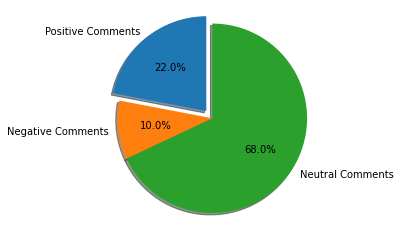

In [115]:
labels = 'Positive Comments','Negative Comments','Neutral Comments'
sizes = [round(pos2),round(neg2),round(neutral2)]
explodes = (0.1,0,0)
fig,ax = plt.subplots()
ax.pie(sizes,labels = labels,explode = explodes, autopct='%1.1f%%',shadow = True,startangle=90)
ax.axis('equal')
plt.show()

In [116]:
data2=data2.drop(columns=['post_date'])
data2

,postNo.,post_text,comments_num,reaction_num,shares_num,comment_text
0,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,My name is Saddam Hussain I am from Qambar Sha...
1,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,CAN YOU TE ME THAT CAN I OPEN A ACCOUNT WITH B...
2,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Any shopping card
3,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,I want to apply
4,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Deatails
...,...,...,...,...,...,...
1165,138,Here’s a look at what a member of the dynamic ...,36,151,2,Congratulations
1166,138,Here’s a look at what a member of the dynamic ...,36,151,2,Hbl bank Wala yai py ni beta ho or costumer in...
1167,140,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,Congratulations
1168,140,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,HBL is a highly active service thanks a lot


In [117]:
data2.insert(6,'Sentiment',sentiment2)
data2

,postNo.,post_text,comments_num,reaction_num,shares_num,comment_text,Sentiment
0,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,My name is Saddam Hussain I am from Qambar Sha...,Positive
1,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,CAN YOU TE ME THAT CAN I OPEN A ACCOUNT WITH B...,Neutral
2,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Any shopping card,Neutral
3,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,I want to apply,Neutral
4,0,HBL achieves another milestone. PKR 1 Billion ...,118,420,21,Deatails,Neutral
...,...,...,...,...,...,...,...
1165,138,Here’s a look at what a member of the dynamic ...,36,151,2,Congratulations,Neutral
1166,138,Here’s a look at what a member of the dynamic ...,36,151,2,Hbl bank Wala yai py ni beta ho or costumer in...,Neutral
1167,140,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,Congratulations,Neutral
1168,140,HBL achieves another milestone. PKR 4 Billion ...,60,238,9,HBL is a highly active service thanks a lot,Neutral
